In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold

In [ ]:
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (404, 13)
Test data shape: (102, 13)


In [ ]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)   # Linear output layer for regression
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [ ]:
k = 4
num_epochs = 100
all_scores = []
all_mae_histories = []

kfold = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, val_index in kfold.split(x_train):
    partial_x_train, val_x = x_train[train_index], x_train[val_index]
    partial_y_train, val_y = y_train[train_index], y_train[val_index]

    model = build_model()
    history = model.fit(partial_x_train, partial_y_train,
                        validation_data=(val_x, val_y),
                        epochs=num_epochs, batch_size=16, verbose=0)

    val_mse, val_mae = model.evaluate(val_x, val_y, verbose=0)
    all_scores.append(val_mae)
    all_mae_histories.append(history.history["val_mae"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [ ]:
print("Validation MAE scores for each fold:", all_scores)
print("Mean validation MAE:", np.mean(all_scores))

Validation MAE scores for each fold: [2.4806103706359863, 2.396021604537964, 2.7154858112335205, 2.3219645023345947]
Mean validation MAE: 2.4785205721855164


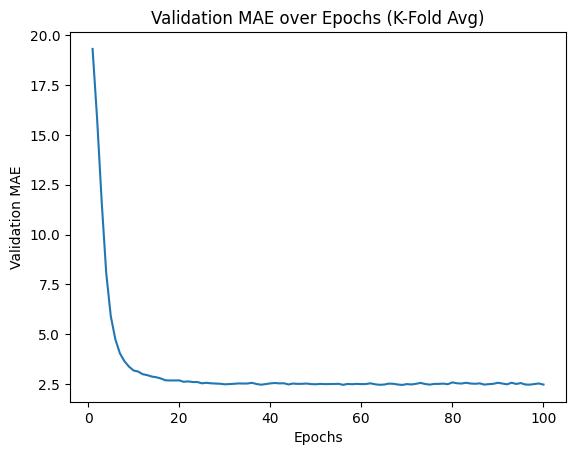

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Validation MAE over Epochs (K-Fold Avg)")
plt.show()